In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
x=pd.read_csv('./K-Nearest Neighbours/train.csv')
#http://localhost:8888/edit/PycharmProjects/Week%203%20-%20KNN/K-Nearest%20Neighbours/train.csv

In [3]:
x.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x=x.values
print(x.shape)
#converting into numpy array to slice the data

(42000, 785)


In [5]:
x_data=x[:,1:]
y_data=x[:,:1]
print(x_data)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
print(x.shape,type(x)) 
print(y_data)

(42000, 785) <class 'numpy.ndarray'>
[[1]
 [0]
 [1]
 ...
 [7]
 [6]
 [9]]


In [11]:
#conerting y_data to 1D
y_data=y_data.reshape((-1,))

In [14]:
# Train Test and split.
split=int(0.8*x_data.shape[0])
print(split)

33600


In [16]:
x_train=x_data[:split,:]
y_train=y_data[:split]
x_test=x_data[split:,:]
y_test=y_data[split:]

In [17]:
print(x_train.shape,x_test.shape,y_train.shape)

(33600, 784) (8400, 784) (33600,)


In [22]:
#visualise some images
def drawImage(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

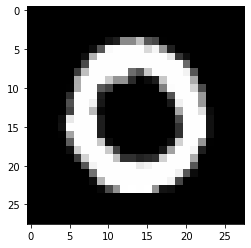

0


In [24]:
drawImage(x_train[1])
print(y_train[1])

In [25]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

# Test Time 
def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred
    

In [26]:
pred=knn(x_train,y_train,x_test[0])

(array([0.]), array([5], dtype=int64))


In [27]:
print(y_test[0])

0


In [28]:
def get_acc(x_test,y_test,x_train,y_train):
    
    y_pred = []
    
    for i in range(y_test.shape[0]):
        p = knn(x_train,y_train,x_test[i])
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_test).sum())/y_test.shape[0]

In [30]:
acc=get_acc(x_test[:10,:],y_test[:10],x_train,y_train)

(array([0.]), array([5], dtype=int64))
(array([7.]), array([5], dtype=int64))
(array([7.]), array([5], dtype=int64))
(array([2.]), array([5], dtype=int64))
(array([2.]), array([5], dtype=int64))
(array([6.]), array([5], dtype=int64))
(array([5.]), array([5], dtype=int64))
(array([7.]), array([5], dtype=int64))
(array([0., 5., 8.]), array([1, 2, 2], dtype=int64))
(array([3., 5.]), array([1, 4], dtype=int64))


In [31]:
print(acc)

0.9
